In [1]:
#utilzando como ideia o modelo que não generalizou muito bem no "house]_price.ipunb"
#vamos avaliar outros parametros

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
%matplotlib inline

In [5]:
housing = pd.read_csv("house-price\\House_Prices.csv")

In [6]:
housing

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [7]:
#sabemos que nos temos os metros quadrados da residência(SqFT), agora nos tambem temos 
#a quantidade de quartos (Bedrooms) e de banheiros
#imaginando que os seguintes comodos sala, cozinha, lavanderia, area, sejam os mesmo para todos
# eque cada tenha um unidade 

#podemos tirar uma media de area por comodo da casa:
#comodos por area =Area total /( 4 (significando sala, cozinha, lavanderia, area) + quartos + banheiros) 

In [10]:
housing["media_sqft_per_rooms"] = housing["SqFt"] / (housing["Bedrooms"] + housing["Bathrooms"] + 4)

In [26]:
housing.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood', 'media_sqft_per_rooms'],
      dtype='object')

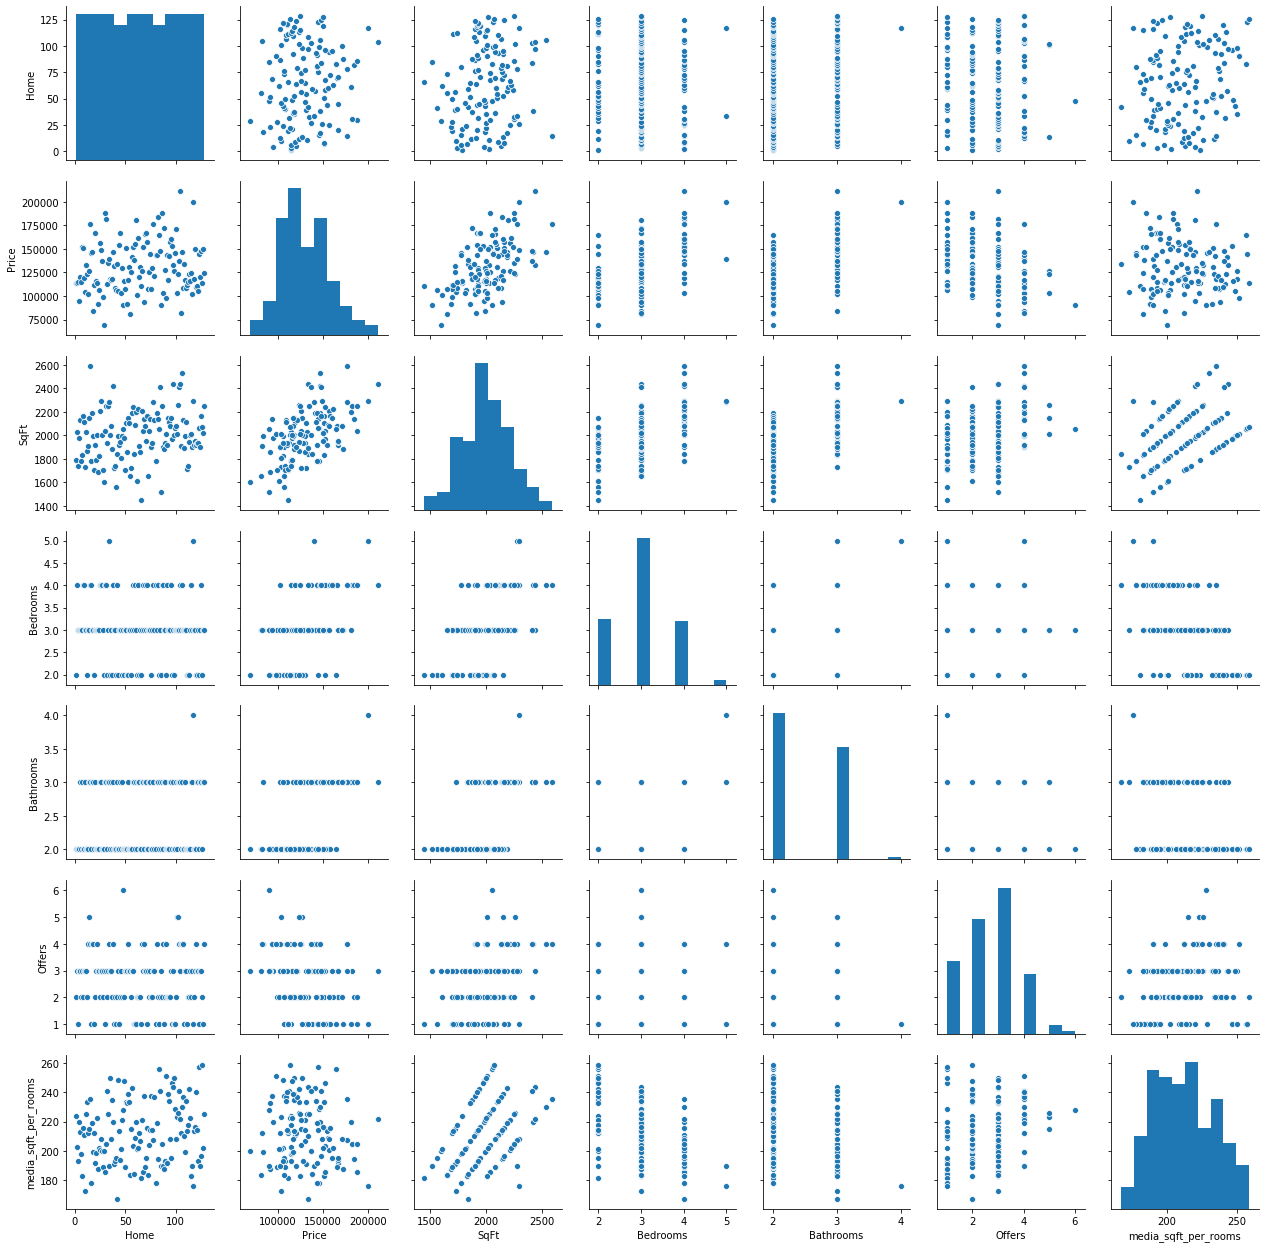

In [14]:
sns.pairplot(housing)

In [15]:
#Agora avaliaremos dois modelos um com a area por como e outro com o de area total

In [204]:
x1 = housing[["SqFt",'Bedrooms', 'Bathrooms', 'Offers']]
y  = housing["Price"]
x2 = housing[["media_sqft_per_rooms", 'Bedrooms', 'Bathrooms', 'Offers']]
x3 = housing[["SqFt","media_sqft_per_rooms",'Bedrooms', 'Bathrooms', 'Offers']]

In [226]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 20)

In [227]:
x2_train, x2_test, x3_train, x3_test = train_test_split(x2, x3, test_size = 0.2, random_state = 20)

In [228]:
lm = LinearRegression()

In [229]:
lm.fit(x1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
print(lm.coef_)

[    62.89552909   9904.99398623  10947.4760711  -14047.93088874]


In [250]:
predict1 = lm.predict(x1_test)

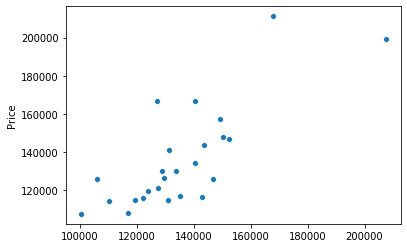

In [251]:
sns.scatterplot(x = predict1, y = y_test )

In [233]:
#segund test

In [234]:
lm2 = LinearRegression()

In [235]:
lm2.fit(x2_train, y_train)
print(lm2.coef_)

[   577.26172256  23152.8175731   24162.44625494 -13770.46906014]


In [236]:
predict2 = lm.predict(x2_test)

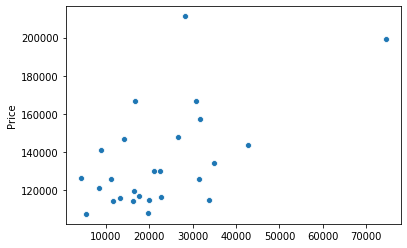

In [237]:
sns.scatterplot(x = predict2, y = y_test)

In [238]:
lm2.fit(x3_train, y_train)
print(lm2.coef_)

[ 1.82752653e+01  4.11580031e+02  1.93308129e+04  2.03356846e+04
 -1.38596896e+04]


In [239]:
predict3 = lm2.predict(x3_test)

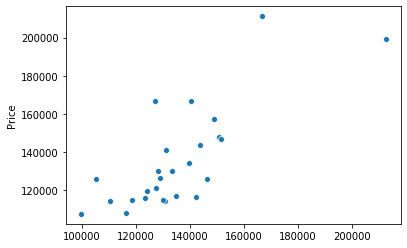

In [240]:
sns.scatterplot(x = predict3, y = y_test)

In [241]:
from sklearn import metrics

In [255]:
for i in (predict1, predict2, predict3):
    print(f"MAE : {metrics.mean_absolute_error(i , y_test)}")
    print(f"MSE : {metrics.mean_squared_error(i , y_test)}")
    print(f"RMSE : {np.sqrt(metrics.mean_squared_error(i , y_test))}\n\n")
    

MAE : 12195.669212816698
MSE : 273778559.05421156
RMSE : 16546.2551368644


MAE : 112705.88131734703
MSE : 13159273933.923615
RMSE : 114713.87855845349


MAE : 12370.68620317969
MSE : 279324829.72698426
RMSE : 16713.013783485738




In [243]:
# Segundo o MSE o modelo que melhor generaliza é o Primeiro
# e tambem os melhores resultados
# claro que temos de avaliar que o conjunto de dados é pequeno,e temos poucos campos a explorar
# e a maior são insubstanciais

In [244]:
#resultados do "house_price"

In [245]:
#MAE : 11689.548560479785
#MSE : 210124219.7325867
#RMSE : 14495.66210052465

In [246]:
# Agora vemos que temos os melhores os resultados em "house_price" quanto observamos o
# MAE, MSe e RMSE